In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HousingData.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.size

7084

In [5]:
df.shape

(506, 14)

In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(), inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

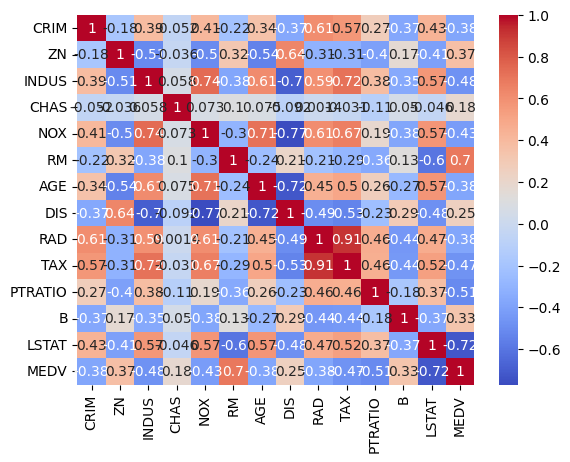

In [9]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# Doing Linear Regression

In [10]:
!pip install sklearn 

from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [14]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
# X_train.shape
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.660000
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.000000
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.990000
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.270000


In [17]:
# y_train.shape
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 354, dtype: float64

In [18]:
# X_test.shape
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,296,16.6,395.50,9.040000
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,254,17.6,396.90,3.530000
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,711,20.1,390.11,18.070000
72,0.09164,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4,305,19.2,390.91,5.520000
452,5.09017,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24,666,20.2,385.09,17.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.100000,0.0,0.740,6.406,97.200000,2.0651,24,666,20.2,385.96,12.715432
23,0.98843,0.0,8.140000,0.0,0.538,5.813,100.000000,4.0952,4,307,21.0,394.54,19.880000
225,0.52693,0.0,6.200000,0.0,0.504,8.725,83.000000,2.8944,8,307,17.4,382.00,4.630000
433,5.58107,0.0,18.100000,0.0,0.713,6.436,87.900000,2.3158,24,666,20.2,100.19,16.220000


In [19]:
# y_test.shape
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64

In [20]:
X.shape

(506, 13)

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_train_predict = lin_model.predict(X_train)
y_train_predict


array([25.27620754, 23.53895596, 22.3662746 , 21.59450176, 16.55764788,
       22.48698589, 29.20232042,  6.42788125, 24.51736861, 17.09558552,
       21.69255724, 25.14259524, 27.69310315, 21.09149321, 40.76648883,
       18.4779974 , 15.23839012, 19.01171342, 17.52859875, 22.66813817,
       23.47913316, 33.05638563, 22.3480984 , 21.00077172, 25.27349388,
       31.53063349, 33.37264553, 28.21717835,  9.22878777,  5.5836941 ,
       18.17126323, 20.50031885, 32.00777396, 33.6705916 , 16.0016462 ,
        4.49675145, 32.86053927, 22.01299732, 18.85717113, 25.65709437,
       18.72687133, 18.51686093, 11.40663474, 31.25243448, 25.12531259,
       19.96240857, 18.98154631, 12.60909503, 27.93747305, 17.55111953,
       32.89270732, 33.3089772 , 24.96611685, 21.42017442, 24.37220645,
       43.91828756, 30.89208943, 33.11631716, 25.48214158, 27.12902164,
       15.2743366 , 32.06713705, 21.53358847, 31.98803073, 28.92219032,
       21.17529275, 23.79713662, 11.87202298, 32.82070217, 36.93

In [31]:
y_test_predict = lin_model.predict(X_test)
y_test_predict

array([31.06364337, 39.21761163, 16.7273078 , 26.8798347 , 20.08344304,
       24.67221577, 19.60901149, 15.88051719, 23.55471677, 22.36750946,
       27.48020142, 20.84899259, -4.26013645, 23.49332308, 20.23920634,
       27.2241578 , 20.94468857,  7.24680044, 43.6017714 , 18.75997848,
       26.43990916, 32.10724085, 12.5893408 , 24.2081342 , 19.08069965,
       16.44836424, 22.84898889, 16.90588593, 25.05590235, 20.97465347,
       24.01959449, 26.70688183, 27.5763452 , 18.39447645, 17.8419079 ,
       19.70196973, 32.99764773, 21.44165559, 26.59077034, 24.31676314,
       15.83661496, 33.64440843, 45.56439352, 19.16843817, 29.25505699,
       17.9086469 , 15.11615178, 27.99364494, 21.22522742, 32.53141657,
       23.08737382, 35.94403822, 17.26847061, 27.77446567, 42.66110418,
       23.88790056, 20.28911351, 34.46858797, 26.90501749, 14.33818835,
       24.22530783, 32.6783483 , 33.46329818, 17.74813159, 22.61084623,
       18.85519845, 21.71569872, 27.77942665, 32.78456963, 13.73

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))

# r2 score
r2 = r2_score(y_test, y_test_predict)

In [33]:
print("RMSE: ", rmse)
print("R2: ", r2)

RMSE:  4.951633592165751
R2:  0.6709481059106915


## Doubt

<Axes: xlabel='LSTAT', ylabel='MEDV'>

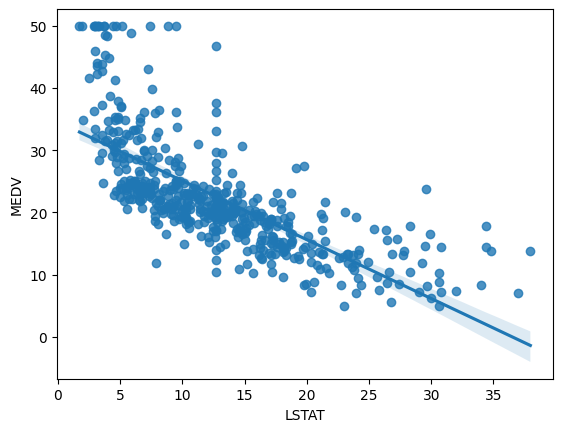

In [34]:
sns.regplot(x=X.columns.all(), y=y, data=df)